In [1]:
# импортируем необходимые библиотеки, функции 
# train_test_split() и roc_auc_score()
import pandas as pd
import numpy as np
from matplotlib import pyplot
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [2]:
# записываем CSV-файл в объект DataFrame
data = pd.read_csv('Data/StateFarm_missing.csv', sep=';')
data.head(5)

,Customer Lifetime Value,Coverage,Education,EmploymentStatus,Gender,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Response
0,2763.519279,Basic,Bachelor,Employed,F,56274.0,NaN,32.0,5.0,NaN,1.0,No
1,NaN,NaN,Bachelor,Unemployed,F,0.0,NaN,13.0,42.0,NaN,NaN,No
2,NaN,NaN,NaN,Employed,F,48767.0,108.0,NaN,38.0,0.0,NaN,No
3,7645.861827,Basic,Bachelor,NaN,NaN,0.0,106.0,18.0,NaN,NaN,7.0,No
4,2813.692575,Basic,Bachelor,NaN,M,43836.0,73.0,12.0,NaN,NaN,1.0,No


In [3]:
# заменяем строковые значения зависимой 
# переменной на целочисленные
dct = {'No': 0, 'Yes': 1}
data['Response'] = data['Response'].map(dct)

In [4]:
# смотрим пропуски и типы переменных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8293 entries, 0 to 8292
Data columns (total 12 columns):
Customer Lifetime Value          8289 non-null float64
Coverage                         8288 non-null object
Education                        8290 non-null object
EmploymentStatus                 8288 non-null object
Gender                           8289 non-null object
Income                           8291 non-null float64
Monthly Premium Auto             8282 non-null float64
Months Since Last Claim          8288 non-null float64
Months Since Policy Inception    8285 non-null float64
Number of Open Complaints        8287 non-null float64
Number of Policies               8288 non-null float64
Response                         8293 non-null int64
dtypes: float64(7), int64(1), object(4)
memory usage: 777.5+ KB


In [5]:
# разбиваем данные на обучающие и тестовые: получаем обучающий
# массив признаков, тестовый массив признаков, обучающий массив
# меток, тестовый массив меток
X_train, X_test, y_train, y_test = train_test_split(data.drop('Response', axis=1), 
                                                              data['Response'], 
                                                              test_size=0.3,
                                                              stratify=data['Response'],
                                                              random_state=42)

In [6]:
# создаем списки количественных 
# и категориальных столбцов
cat_columns = X_train.dtypes[X_train.dtypes == 'object'].index
num_columns = X_train.dtypes[X_train.dtypes != 'object'].index

In [7]:
# заменяем пропуски в количественных переменных средними
for i in num_columns:
    X_train[i].fillna(X_train[i].mean(), inplace=True)
    X_test[i].fillna(X_train[i].mean(), inplace=True)

In [8]:
# заменяем пропуски в категориальных переменных модами
for i in cat_columns:
    X_train[i].fillna(X_train[i].value_counts().index[0], inplace=True)
    X_test[i].fillna(X_train[i].value_counts().index[0], inplace=True)

In [9]:
# выполняем дамми-кодирование
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [10]:
# создаем объекты DMatrix
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [11]:
params = {
    'objective': 'binary:logistic',
    'eta': 0.05,
    'max_depth': 4,
    'seed': 42,
    'eval_metric': 'auc',
    'silent': 1
}

# задаем количество итераций
num_rounds = 100

In [12]:
# задаем наборы, для которых будем отслеживать 
# метрику, заданную с помощью eval_metric
evallist = [(dtrain, 'train'), (dtest, 'test')]
# обучаем модель
xgb_model = xgb.train(params, dtrain, num_rounds, evallist)

[0]	train-auc:0.645132	test-auc:0.623989
[1]	train-auc:0.650588	test-auc:0.626566
[2]	train-auc:0.650574	test-auc:0.626666
[3]	train-auc:0.650819	test-auc:0.626767
[4]	train-auc:0.650935	test-auc:0.627025
[5]	train-auc:0.651063	test-auc:0.627209
[6]	train-auc:0.651137	test-auc:0.627218
[7]	train-auc:0.651158	test-auc:0.627258
[8]	train-auc:0.65121	test-auc:0.627236
[9]	train-auc:0.651197	test-auc:0.627232
[10]	train-auc:0.684462	test-auc:0.645438
[11]	train-auc:0.69513	test-auc:0.652049
[12]	train-auc:0.698836	test-auc:0.655492
[13]	train-auc:0.699804	test-auc:0.655859
[14]	train-auc:0.699456	test-auc:0.655331
[15]	train-auc:0.699426	test-auc:0.655285
[16]	train-auc:0.699387	test-auc:0.655227
[17]	train-auc:0.704089	test-auc:0.667339
[18]	train-auc:0.709807	test-auc:0.669302
[19]	train-auc:0.71421	test-auc:0.672806
[20]	train-auc:0.71445	test-auc:0.673023
[21]	train-auc:0.713495	test-auc:0.671415
[22]	train-auc:0.713458	test-auc:0.671429
[23]	train-auc:0.713081	test-auc:0.671256
[24]	t

In [13]:
# записываем вероятности
preds_prob = xgb_model.predict(dtest)

# вычисляем AUC на тестовой выборке
print('AUC на тестовой выборке: {:.3f}'.format(roc_auc_score(y_test, preds_prob)))

AUC на тестовой выборке: 0.795


In [14]:
# преобразовываем датафреймы в массивы NumPy
X_train = X_train.values
X_test = X_test.values

y_train = y_train.values
y_test = y_test.values

In [15]:
# создаем экземпляр класса XGBClassifier
xgb_model_sklearn = xgb.XGBClassifier(eta=0.05,
                                      n_estimators=1200, 
                                      max_depth=4, 
                                      objective='binary:logistic',
                                      random_state=42)

# строим модель
xgb_model_sklearn.fit(X_train, y_train)

# оцениваем дискриминирующую способность модели xgboost
print("AUC на обучающей выборке: {:.3f}".format(
    roc_auc_score(y_train, xgb_model_sklearn.predict_proba(X_train)[:, 1])))
print("AUC на тестовой выборке: {:.3f}".format(
    roc_auc_score(y_test, xgb_model_sklearn.predict_proba(X_test)[:, 1])))

AUC на обучающей выборке: 0.990
AUC на тестовой выборке: 0.914


In [18]:
h = 'gain'
xgb_model_sklearn.get_booster().get_score(importance_type=h)

{'f18': 2.7980857986842627,
 'f2': 0.9729630442552734,
 'f1': 1.1221273909713438,
 'f4': 1.0492377320440007,
 'f0': 1.0738921347111103,
 'f3': 0.9572815659649476,
 'f9': 1.5735829484973685,
 'f11': 0.7702810658930096,
 'f6': 1.3553355883029274,
 'f5': 0.46581804083061706,
 'f15': 0.9431390384883722,
 'f7': 1.535695138125577,
 'f12': 1.8937144861658235,
 'f8': 0.5557365666483605,
 'f20': 0.6492456790166575,
 'f17': 0.21206814989375,
 'f16': 1.0789778023168521,
 'f13': 1.0699372981860418,
 'f10': 0.841997872575507,
 'f14': 0.7765208259594342}

In [16]:
# определяем тестовый набор, для которого 
# будем выводить метрики
eval_set = [(X_test, y_test)]
# строим модель
xgb_model_sklearn.fit(X_train, 
                      y_train,
                      eval_metric=['auc', 'logloss'], 
                      eval_set=eval_set,
                      verbose=True)

[0]	validation_0-auc:0.623989	validation_0-logloss:0.630045
[1]	validation_0-auc:0.626896	validation_0-logloss:0.578232
[2]	validation_0-auc:0.626909	validation_0-logloss:0.535548
[3]	validation_0-auc:0.626922	validation_0-logloss:0.499999
[4]	validation_0-auc:0.62717	validation_0-logloss:0.469968
[5]	validation_0-auc:0.646825	validation_0-logloss:0.444496
[6]	validation_0-auc:0.652058	validation_0-logloss:0.423233
[7]	validation_0-auc:0.655712	validation_0-logloss:0.404734
[8]	validation_0-auc:0.655963	validation_0-logloss:0.389094
[9]	validation_0-auc:0.668141	validation_0-logloss:0.375498
[10]	validation_0-auc:0.668129	validation_0-logloss:0.364249
[11]	validation_0-auc:0.662928	validation_0-logloss:0.354295
[12]	validation_0-auc:0.663282	validation_0-logloss:0.34597
[13]	validation_0-auc:0.663156	validation_0-logloss:0.33881
[14]	validation_0-auc:0.664472	validation_0-logloss:0.332538
[15]	validation_0-auc:0.66411	validation_0-logloss:0.327097
[16]	validation_0-auc:0.66568	validati

[135]	validation_0-auc:0.871408	validation_0-logloss:0.235254
[136]	validation_0-auc:0.871135	validation_0-logloss:0.235117
[137]	validation_0-auc:0.87348	validation_0-logloss:0.234398
[138]	validation_0-auc:0.873872	validation_0-logloss:0.233593
[139]	validation_0-auc:0.873944	validation_0-logloss:0.233421
[140]	validation_0-auc:0.873953	validation_0-logloss:0.233098
[141]	validation_0-auc:0.874308	validation_0-logloss:0.232353
[142]	validation_0-auc:0.876339	validation_0-logloss:0.231213
[143]	validation_0-auc:0.879139	validation_0-logloss:0.229807
[144]	validation_0-auc:0.879261	validation_0-logloss:0.229649
[145]	validation_0-auc:0.879844	validation_0-logloss:0.229007
[146]	validation_0-auc:0.881087	validation_0-logloss:0.228501
[147]	validation_0-auc:0.881338	validation_0-logloss:0.22818
[148]	validation_0-auc:0.881232	validation_0-logloss:0.227924
[149]	validation_0-auc:0.881479	validation_0-logloss:0.227734
[150]	validation_0-auc:0.882375	validation_0-logloss:0.227128
[151]	vali

[268]	validation_0-auc:0.904679	validation_0-logloss:0.19494
[269]	validation_0-auc:0.904519	validation_0-logloss:0.194613
[270]	validation_0-auc:0.904937	validation_0-logloss:0.194163
[271]	validation_0-auc:0.905047	validation_0-logloss:0.194071
[272]	validation_0-auc:0.905375	validation_0-logloss:0.193701
[273]	validation_0-auc:0.90474	validation_0-logloss:0.193727
[274]	validation_0-auc:0.904761	validation_0-logloss:0.193686
[275]	validation_0-auc:0.904903	validation_0-logloss:0.193627
[276]	validation_0-auc:0.90484	validation_0-logloss:0.193442
[277]	validation_0-auc:0.904907	validation_0-logloss:0.193404
[278]	validation_0-auc:0.905054	validation_0-logloss:0.193062
[279]	validation_0-auc:0.905142	validation_0-logloss:0.192814
[280]	validation_0-auc:0.905332	validation_0-logloss:0.192665
[281]	validation_0-auc:0.905456	validation_0-logloss:0.192546
[282]	validation_0-auc:0.905522	validation_0-logloss:0.192498
[283]	validation_0-auc:0.905718	validation_0-logloss:0.192369
[284]	valid

[401]	validation_0-auc:0.911755	validation_0-logloss:0.177549
[402]	validation_0-auc:0.911786	validation_0-logloss:0.177505
[403]	validation_0-auc:0.911617	validation_0-logloss:0.177545
[404]	validation_0-auc:0.911705	validation_0-logloss:0.17745
[405]	validation_0-auc:0.911755	validation_0-logloss:0.177392
[406]	validation_0-auc:0.911796	validation_0-logloss:0.177376
[407]	validation_0-auc:0.911918	validation_0-logloss:0.177304
[408]	validation_0-auc:0.912022	validation_0-logloss:0.177102
[409]	validation_0-auc:0.912123	validation_0-logloss:0.176997
[410]	validation_0-auc:0.912101	validation_0-logloss:0.177005
[411]	validation_0-auc:0.912148	validation_0-logloss:0.176889
[412]	validation_0-auc:0.91241	validation_0-logloss:0.176707
[413]	validation_0-auc:0.912462	validation_0-logloss:0.176597
[414]	validation_0-auc:0.912508	validation_0-logloss:0.176565
[415]	validation_0-auc:0.91265	validation_0-logloss:0.176469
[416]	validation_0-auc:0.912711	validation_0-logloss:0.176417
[417]	valid

[534]	validation_0-auc:0.914275	validation_0-logloss:0.170576
[535]	validation_0-auc:0.914299	validation_0-logloss:0.170542
[536]	validation_0-auc:0.914397	validation_0-logloss:0.170476
[537]	validation_0-auc:0.914537	validation_0-logloss:0.170277
[538]	validation_0-auc:0.914598	validation_0-logloss:0.170272
[539]	validation_0-auc:0.914533	validation_0-logloss:0.170295
[540]	validation_0-auc:0.914415	validation_0-logloss:0.170301
[541]	validation_0-auc:0.914641	validation_0-logloss:0.170202
[542]	validation_0-auc:0.914607	validation_0-logloss:0.170218
[543]	validation_0-auc:0.914453	validation_0-logloss:0.170238
[544]	validation_0-auc:0.914478	validation_0-logloss:0.170201
[545]	validation_0-auc:0.914525	validation_0-logloss:0.170124
[546]	validation_0-auc:0.914525	validation_0-logloss:0.170125
[547]	validation_0-auc:0.914557	validation_0-logloss:0.170124
[548]	validation_0-auc:0.914521	validation_0-logloss:0.17001
[549]	validation_0-auc:0.914379	validation_0-logloss:0.170086
[550]	val

[667]	validation_0-auc:0.913612	validation_0-logloss:0.168833
[668]	validation_0-auc:0.913735	validation_0-logloss:0.168795
[669]	validation_0-auc:0.913942	validation_0-logloss:0.168714
[670]	validation_0-auc:0.913954	validation_0-logloss:0.168699
[671]	validation_0-auc:0.914037	validation_0-logloss:0.168622
[672]	validation_0-auc:0.914099	validation_0-logloss:0.168525
[673]	validation_0-auc:0.914092	validation_0-logloss:0.168566
[674]	validation_0-auc:0.914356	validation_0-logloss:0.168406
[675]	validation_0-auc:0.914345	validation_0-logloss:0.168334
[676]	validation_0-auc:0.914403	validation_0-logloss:0.168252
[677]	validation_0-auc:0.914397	validation_0-logloss:0.168234
[678]	validation_0-auc:0.914437	validation_0-logloss:0.168224
[679]	validation_0-auc:0.914455	validation_0-logloss:0.16817
[680]	validation_0-auc:0.914455	validation_0-logloss:0.168161
[681]	validation_0-auc:0.914489	validation_0-logloss:0.168164
[682]	validation_0-auc:0.914458	validation_0-logloss:0.168214
[683]	val

[800]	validation_0-auc:0.915011	validation_0-logloss:0.168237
[801]	validation_0-auc:0.915016	validation_0-logloss:0.168251
[802]	validation_0-auc:0.914998	validation_0-logloss:0.168238
[803]	validation_0-auc:0.915001	validation_0-logloss:0.168306
[804]	validation_0-auc:0.914966	validation_0-logloss:0.168347
[805]	validation_0-auc:0.914909	validation_0-logloss:0.168395
[806]	validation_0-auc:0.914869	validation_0-logloss:0.168433
[807]	validation_0-auc:0.91488	validation_0-logloss:0.168374
[808]	validation_0-auc:0.914932	validation_0-logloss:0.168351
[809]	validation_0-auc:0.914926	validation_0-logloss:0.168374
[810]	validation_0-auc:0.915016	validation_0-logloss:0.168313
[811]	validation_0-auc:0.914932	validation_0-logloss:0.168366
[812]	validation_0-auc:0.914959	validation_0-logloss:0.168371
[813]	validation_0-auc:0.914935	validation_0-logloss:0.168365
[814]	validation_0-auc:0.91495	validation_0-logloss:0.168358
[815]	validation_0-auc:0.914953	validation_0-logloss:0.168347
[816]	vali

[933]	validation_0-auc:0.915147	validation_0-logloss:0.168712
[934]	validation_0-auc:0.915129	validation_0-logloss:0.168681
[935]	validation_0-auc:0.914998	validation_0-logloss:0.168754
[936]	validation_0-auc:0.914971	validation_0-logloss:0.168756
[937]	validation_0-auc:0.914935	validation_0-logloss:0.168801
[938]	validation_0-auc:0.914883	validation_0-logloss:0.168829
[939]	validation_0-auc:0.914862	validation_0-logloss:0.168857
[940]	validation_0-auc:0.914907	validation_0-logloss:0.168835
[941]	validation_0-auc:0.914851	validation_0-logloss:0.168831
[942]	validation_0-auc:0.914835	validation_0-logloss:0.168855
[943]	validation_0-auc:0.914865	validation_0-logloss:0.168877
[944]	validation_0-auc:0.914835	validation_0-logloss:0.168903
[945]	validation_0-auc:0.914772	validation_0-logloss:0.168971
[946]	validation_0-auc:0.914849	validation_0-logloss:0.168982
[947]	validation_0-auc:0.914842	validation_0-logloss:0.168987
[948]	validation_0-auc:0.914837	validation_0-logloss:0.169017
[949]	va

[1065]	validation_0-auc:0.914883	validation_0-logloss:0.170102
[1066]	validation_0-auc:0.914921	validation_0-logloss:0.170143
[1067]	validation_0-auc:0.914919	validation_0-logloss:0.17016
[1068]	validation_0-auc:0.914865	validation_0-logloss:0.170263
[1069]	validation_0-auc:0.914808	validation_0-logloss:0.170298
[1070]	validation_0-auc:0.914706	validation_0-logloss:0.170369
[1071]	validation_0-auc:0.914767	validation_0-logloss:0.170338
[1072]	validation_0-auc:0.914749	validation_0-logloss:0.170394
[1073]	validation_0-auc:0.914781	validation_0-logloss:0.170407
[1074]	validation_0-auc:0.914786	validation_0-logloss:0.1704
[1075]	validation_0-auc:0.914792	validation_0-logloss:0.170408
[1076]	validation_0-auc:0.914828	validation_0-logloss:0.170413
[1077]	validation_0-auc:0.914819	validation_0-logloss:0.17048
[1078]	validation_0-auc:0.914797	validation_0-logloss:0.170492
[1079]	validation_0-auc:0.914781	validation_0-logloss:0.1705
[1080]	validation_0-auc:0.914733	validation_0-logloss:0.17053

[1196]	validation_0-auc:0.914324	validation_0-logloss:0.172291
[1197]	validation_0-auc:0.914325	validation_0-logloss:0.1723
[1198]	validation_0-auc:0.91432	validation_0-logloss:0.172303
[1199]	validation_0-auc:0.914325	validation_0-logloss:0.172242


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eta=0.05, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=1200, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [17]:
# определяем обучающий и тестовый наборы, 
# для которых будем выводить метрики
eval_set2 = [(X_train, y_train), (X_test, y_test)]
# строим модель
xgb_model_sklearn.fit(X_train, 
                      y_train, 
                      eval_metric=['auc', 'logloss'], 
                      eval_set=eval_set2, 
                      verbose=True)

[0]	validation_0-auc:0.645132	validation_0-logloss:0.629351	validation_1-auc:0.623989	validation_1-logloss:0.630045
[1]	validation_0-auc:0.650625	validation_0-logloss:0.577286	validation_1-auc:0.626896	validation_1-logloss:0.578232
[2]	validation_0-auc:0.650931	validation_0-logloss:0.533948	validation_1-auc:0.626909	validation_1-logloss:0.535548
[3]	validation_0-auc:0.651349	validation_0-logloss:0.497764	validation_1-auc:0.626922	validation_1-logloss:0.499999
[4]	validation_0-auc:0.651163	validation_0-logloss:0.467363	validation_1-auc:0.62717	validation_1-logloss:0.469968
[5]	validation_0-auc:0.685871	validation_0-logloss:0.441507	validation_1-auc:0.646825	validation_1-logloss:0.444496
[6]	validation_0-auc:0.69512	validation_0-logloss:0.419416	validation_1-auc:0.652058	validation_1-logloss:0.423233
[7]	validation_0-auc:0.69878	validation_0-logloss:0.400489	validation_1-auc:0.655712	validation_1-logloss:0.404734
[8]	validation_0-auc:0.699741	validation_0-logloss:0.384412	validation_1-au

[71]	validation_0-auc:0.906861	validation_0-logloss:0.236556	validation_1-auc:0.819103	validation_1-logloss:0.266564
[72]	validation_0-auc:0.907519	validation_0-logloss:0.235753	validation_1-auc:0.819342	validation_1-logloss:0.266317
[73]	validation_0-auc:0.907675	validation_0-logloss:0.235272	validation_1-auc:0.819006	validation_1-logloss:0.266257
[74]	validation_0-auc:0.908251	validation_0-logloss:0.23491	validation_1-auc:0.819356	validation_1-logloss:0.266055
[75]	validation_0-auc:0.91063	validation_0-logloss:0.233725	validation_1-auc:0.821385	validation_1-logloss:0.265317
[76]	validation_0-auc:0.910765	validation_0-logloss:0.233402	validation_1-auc:0.821279	validation_1-logloss:0.265216
[77]	validation_0-auc:0.910923	validation_0-logloss:0.232972	validation_1-auc:0.821659	validation_1-logloss:0.264997
[78]	validation_0-auc:0.91135	validation_0-logloss:0.232332	validation_1-auc:0.822068	validation_1-logloss:0.264676
[79]	validation_0-auc:0.911358	validation_0-logloss:0.231627	valida

[141]	validation_0-auc:0.957363	validation_0-logloss:0.18933	validation_1-auc:0.874308	validation_1-logloss:0.232353
[142]	validation_0-auc:0.957979	validation_0-logloss:0.188649	validation_1-auc:0.876339	validation_1-logloss:0.231213
[143]	validation_0-auc:0.959115	validation_0-logloss:0.187453	validation_1-auc:0.879139	validation_1-logloss:0.229807
[144]	validation_0-auc:0.959161	validation_0-logloss:0.187251	validation_1-auc:0.879261	validation_1-logloss:0.229649
[145]	validation_0-auc:0.9593	validation_0-logloss:0.186465	validation_1-auc:0.879844	validation_1-logloss:0.229007
[146]	validation_0-auc:0.960084	validation_0-logloss:0.185626	validation_1-auc:0.881087	validation_1-logloss:0.228501
[147]	validation_0-auc:0.960297	validation_0-logloss:0.185199	validation_1-auc:0.881338	validation_1-logloss:0.22818
[148]	validation_0-auc:0.960532	validation_0-logloss:0.184622	validation_1-auc:0.881232	validation_1-logloss:0.227924
[149]	validation_0-auc:0.9606	validation_0-logloss:0.184413	

[211]	validation_0-auc:0.973452	validation_0-logloss:0.157971	validation_1-auc:0.895494	validation_1-logloss:0.208547
[212]	validation_0-auc:0.973498	validation_0-logloss:0.157735	validation_1-auc:0.895512	validation_1-logloss:0.208378
[213]	validation_0-auc:0.973504	validation_0-logloss:0.157608	validation_1-auc:0.895354	validation_1-logloss:0.208319
[214]	validation_0-auc:0.973689	validation_0-logloss:0.157254	validation_1-auc:0.895903	validation_1-logloss:0.207892
[215]	validation_0-auc:0.973772	validation_0-logloss:0.156848	validation_1-auc:0.895983	validation_1-logloss:0.207526
[216]	validation_0-auc:0.973891	validation_0-logloss:0.156597	validation_1-auc:0.896279	validation_1-logloss:0.207236
[217]	validation_0-auc:0.973864	validation_0-logloss:0.156527	validation_1-auc:0.896338	validation_1-logloss:0.207125
[218]	validation_0-auc:0.973959	validation_0-logloss:0.156192	validation_1-auc:0.8966	validation_1-logloss:0.206886
[219]	validation_0-auc:0.974008	validation_0-logloss:0.155

[281]	validation_0-auc:0.981379	validation_0-logloss:0.135843	validation_1-auc:0.905456	validation_1-logloss:0.192546
[282]	validation_0-auc:0.98138	validation_0-logloss:0.135788	validation_1-auc:0.905522	validation_1-logloss:0.192498
[283]	validation_0-auc:0.981566	validation_0-logloss:0.13533	validation_1-auc:0.905718	validation_1-logloss:0.192369
[284]	validation_0-auc:0.981622	validation_0-logloss:0.135118	validation_1-auc:0.905969	validation_1-logloss:0.192177
[285]	validation_0-auc:0.981691	validation_0-logloss:0.134879	validation_1-auc:0.906152	validation_1-logloss:0.191971
[286]	validation_0-auc:0.981696	validation_0-logloss:0.134787	validation_1-auc:0.906207	validation_1-logloss:0.191888
[287]	validation_0-auc:0.981735	validation_0-logloss:0.134609	validation_1-auc:0.906218	validation_1-logloss:0.191794
[288]	validation_0-auc:0.981732	validation_0-logloss:0.134561	validation_1-auc:0.906261	validation_1-logloss:0.191727
[289]	validation_0-auc:0.981739	validation_0-logloss:0.134

[351]	validation_0-auc:0.984818	validation_0-logloss:0.121624	validation_1-auc:0.910223	validation_1-logloss:0.18269
[352]	validation_0-auc:0.984837	validation_0-logloss:0.12154	validation_1-auc:0.910259	validation_1-logloss:0.182615
[353]	validation_0-auc:0.984852	validation_0-logloss:0.121461	validation_1-auc:0.910503	validation_1-logloss:0.18241
[354]	validation_0-auc:0.984851	validation_0-logloss:0.121399	validation_1-auc:0.910537	validation_1-logloss:0.182396
[355]	validation_0-auc:0.984856	validation_0-logloss:0.121286	validation_1-auc:0.910659	validation_1-logloss:0.18236
[356]	validation_0-auc:0.984884	validation_0-logloss:0.121159	validation_1-auc:0.910724	validation_1-logloss:0.18227
[357]	validation_0-auc:0.98499	validation_0-logloss:0.120805	validation_1-auc:0.910977	validation_1-logloss:0.181886
[358]	validation_0-auc:0.985009	validation_0-logloss:0.120664	validation_1-auc:0.910853	validation_1-logloss:0.181861
[359]	validation_0-auc:0.98504	validation_0-logloss:0.120467	v

[421]	validation_0-auc:0.986861	validation_0-logloss:0.110752	validation_1-auc:0.913104	validation_1-logloss:0.175955
[422]	validation_0-auc:0.986897	validation_0-logloss:0.110583	validation_1-auc:0.91298	validation_1-logloss:0.175834
[423]	validation_0-auc:0.986898	validation_0-logloss:0.110523	validation_1-auc:0.913081	validation_1-logloss:0.175817
[424]	validation_0-auc:0.986906	validation_0-logloss:0.11044	validation_1-auc:0.912908	validation_1-logloss:0.17578
[425]	validation_0-auc:0.986924	validation_0-logloss:0.110286	validation_1-auc:0.91286	validation_1-logloss:0.17582
[426]	validation_0-auc:0.98694	validation_0-logloss:0.110139	validation_1-auc:0.912934	validation_1-logloss:0.175682
[427]	validation_0-auc:0.986952	validation_0-logloss:0.109989	validation_1-auc:0.912901	validation_1-logloss:0.175649
[428]	validation_0-auc:0.986964	validation_0-logloss:0.109908	validation_1-auc:0.912795	validation_1-logloss:0.17568
[429]	validation_0-auc:0.986973	validation_0-logloss:0.109826	v

[491]	validation_0-auc:0.987801	validation_0-logloss:0.102893	validation_1-auc:0.913834	validation_1-logloss:0.171787
[492]	validation_0-auc:0.98782	validation_0-logloss:0.102743	validation_1-auc:0.913818	validation_1-logloss:0.17171
[493]	validation_0-auc:0.987828	validation_0-logloss:0.102637	validation_1-auc:0.913979	validation_1-logloss:0.171521
[494]	validation_0-auc:0.987849	validation_0-logloss:0.102518	validation_1-auc:0.914099	validation_1-logloss:0.171482
[495]	validation_0-auc:0.987863	validation_0-logloss:0.102459	validation_1-auc:0.914026	validation_1-logloss:0.171507
[496]	validation_0-auc:0.987862	validation_0-logloss:0.102437	validation_1-auc:0.914044	validation_1-logloss:0.171501
[497]	validation_0-auc:0.987858	validation_0-logloss:0.102333	validation_1-auc:0.914243	validation_1-logloss:0.171469
[498]	validation_0-auc:0.987863	validation_0-logloss:0.102317	validation_1-auc:0.914272	validation_1-logloss:0.171441
[499]	validation_0-auc:0.987865	validation_0-logloss:0.102

[561]	validation_0-auc:0.988369	validation_0-logloss:0.097435	validation_1-auc:0.913945	validation_1-logloss:0.170164
[562]	validation_0-auc:0.988398	validation_0-logloss:0.097305	validation_1-auc:0.914214	validation_1-logloss:0.170117
[563]	validation_0-auc:0.988401	validation_0-logloss:0.097232	validation_1-auc:0.914282	validation_1-logloss:0.170025
[564]	validation_0-auc:0.98841	validation_0-logloss:0.097089	validation_1-auc:0.914489	validation_1-logloss:0.169812
[565]	validation_0-auc:0.988456	validation_0-logloss:0.096962	validation_1-auc:0.914729	validation_1-logloss:0.16961
[566]	validation_0-auc:0.988464	validation_0-logloss:0.096838	validation_1-auc:0.914718	validation_1-logloss:0.169547
[567]	validation_0-auc:0.988461	validation_0-logloss:0.096786	validation_1-auc:0.914767	validation_1-logloss:0.169474
[568]	validation_0-auc:0.988466	validation_0-logloss:0.096679	validation_1-auc:0.914822	validation_1-logloss:0.169409
[569]	validation_0-auc:0.988466	validation_0-logloss:0.096

[631]	validation_0-auc:0.988872	validation_0-logloss:0.092612	validation_1-auc:0.913981	validation_1-logloss:0.169058
[632]	validation_0-auc:0.988871	validation_0-logloss:0.092566	validation_1-auc:0.914022	validation_1-logloss:0.169068
[633]	validation_0-auc:0.988867	validation_0-logloss:0.092542	validation_1-auc:0.91404	validation_1-logloss:0.169034
[634]	validation_0-auc:0.988863	validation_0-logloss:0.092521	validation_1-auc:0.914083	validation_1-logloss:0.169072
[635]	validation_0-auc:0.988863	validation_0-logloss:0.092483	validation_1-auc:0.914085	validation_1-logloss:0.169112
[636]	validation_0-auc:0.988866	validation_0-logloss:0.092476	validation_1-auc:0.91411	validation_1-logloss:0.169059
[637]	validation_0-auc:0.988873	validation_0-logloss:0.092409	validation_1-auc:0.914037	validation_1-logloss:0.169082
[638]	validation_0-auc:0.988881	validation_0-logloss:0.092331	validation_1-auc:0.914098	validation_1-logloss:0.168995
[639]	validation_0-auc:0.988882	validation_0-logloss:0.092

[701]	validation_0-auc:0.98921	validation_0-logloss:0.088979	validation_1-auc:0.914731	validation_1-logloss:0.168014
[702]	validation_0-auc:0.989215	validation_0-logloss:0.088947	validation_1-auc:0.914725	validation_1-logloss:0.168058
[703]	validation_0-auc:0.989217	validation_0-logloss:0.088873	validation_1-auc:0.914788	validation_1-logloss:0.168128
[704]	validation_0-auc:0.989214	validation_0-logloss:0.088834	validation_1-auc:0.914851	validation_1-logloss:0.168067
[705]	validation_0-auc:0.989216	validation_0-logloss:0.088788	validation_1-auc:0.914969	validation_1-logloss:0.16801
[706]	validation_0-auc:0.989219	validation_0-logloss:0.088741	validation_1-auc:0.914977	validation_1-logloss:0.167989
[707]	validation_0-auc:0.989219	validation_0-logloss:0.088724	validation_1-auc:0.914982	validation_1-logloss:0.168002
[708]	validation_0-auc:0.989221	validation_0-logloss:0.088675	validation_1-auc:0.914991	validation_1-logloss:0.168009
[709]	validation_0-auc:0.98922	validation_0-logloss:0.0886

[771]	validation_0-auc:0.989404	validation_0-logloss:0.086451	validation_1-auc:0.915115	validation_1-logloss:0.168048
[772]	validation_0-auc:0.989416	validation_0-logloss:0.086331	validation_1-auc:0.915109	validation_1-logloss:0.167974
[773]	validation_0-auc:0.989424	validation_0-logloss:0.086285	validation_1-auc:0.915199	validation_1-logloss:0.167902
[774]	validation_0-auc:0.989423	validation_0-logloss:0.086275	validation_1-auc:0.91522	validation_1-logloss:0.167895
[775]	validation_0-auc:0.989423	validation_0-logloss:0.086237	validation_1-auc:0.915222	validation_1-logloss:0.167871
[776]	validation_0-auc:0.989426	validation_0-logloss:0.086186	validation_1-auc:0.915231	validation_1-logloss:0.167787
[777]	validation_0-auc:0.989441	validation_0-logloss:0.086124	validation_1-auc:0.915461	validation_1-logloss:0.167667
[778]	validation_0-auc:0.989439	validation_0-logloss:0.086115	validation_1-auc:0.91549	validation_1-logloss:0.167663
[779]	validation_0-auc:0.989437	validation_0-logloss:0.086

[841]	validation_0-auc:0.98963	validation_0-logloss:0.084078	validation_1-auc:0.915377	validation_1-logloss:0.168235
[842]	validation_0-auc:0.989627	validation_0-logloss:0.084067	validation_1-auc:0.915364	validation_1-logloss:0.168266
[843]	validation_0-auc:0.989625	validation_0-logloss:0.084048	validation_1-auc:0.91536	validation_1-logloss:0.168288
[844]	validation_0-auc:0.989622	validation_0-logloss:0.084033	validation_1-auc:0.915314	validation_1-logloss:0.168277
[845]	validation_0-auc:0.98963	validation_0-logloss:0.083997	validation_1-auc:0.915369	validation_1-logloss:0.168265
[846]	validation_0-auc:0.989629	validation_0-logloss:0.083979	validation_1-auc:0.915319	validation_1-logloss:0.168281
[847]	validation_0-auc:0.989629	validation_0-logloss:0.083966	validation_1-auc:0.915391	validation_1-logloss:0.168217
[848]	validation_0-auc:0.989626	validation_0-logloss:0.083952	validation_1-auc:0.915314	validation_1-logloss:0.168239
[849]	validation_0-auc:0.989629	validation_0-logloss:0.0839

[911]	validation_0-auc:0.989747	validation_0-logloss:0.082202	validation_1-auc:0.915099	validation_1-logloss:0.168848
[912]	validation_0-auc:0.989756	validation_0-logloss:0.082141	validation_1-auc:0.915194	validation_1-logloss:0.168775
[913]	validation_0-auc:0.989759	validation_0-logloss:0.082111	validation_1-auc:0.915229	validation_1-logloss:0.168742
[914]	validation_0-auc:0.989769	validation_0-logloss:0.082049	validation_1-auc:0.915289	validation_1-logloss:0.168718
[915]	validation_0-auc:0.989767	validation_0-logloss:0.082041	validation_1-auc:0.915256	validation_1-logloss:0.168743
[916]	validation_0-auc:0.989774	validation_0-logloss:0.082005	validation_1-auc:0.915299	validation_1-logloss:0.168737
[917]	validation_0-auc:0.989777	validation_0-logloss:0.081935	validation_1-auc:0.915298	validation_1-logloss:0.168683
[918]	validation_0-auc:0.989776	validation_0-logloss:0.081923	validation_1-auc:0.915319	validation_1-logloss:0.168669
[919]	validation_0-auc:0.989776	validation_0-logloss:0.0

[981]	validation_0-auc:0.989874	validation_0-logloss:0.080439	validation_1-auc:0.914858	validation_1-logloss:0.169252
[982]	validation_0-auc:0.989873	validation_0-logloss:0.080433	validation_1-auc:0.914837	validation_1-logloss:0.169269
[983]	validation_0-auc:0.989875	validation_0-logloss:0.080423	validation_1-auc:0.914856	validation_1-logloss:0.169261
[984]	validation_0-auc:0.989881	validation_0-logloss:0.080399	validation_1-auc:0.91488	validation_1-logloss:0.169273
[985]	validation_0-auc:0.98988	validation_0-logloss:0.080395	validation_1-auc:0.91489	validation_1-logloss:0.169275
[986]	validation_0-auc:0.989883	validation_0-logloss:0.08036	validation_1-auc:0.914925	validation_1-logloss:0.169183
[987]	validation_0-auc:0.989884	validation_0-logloss:0.08035	validation_1-auc:0.914951	validation_1-logloss:0.169213
[988]	validation_0-auc:0.989883	validation_0-logloss:0.08031	validation_1-auc:0.915043	validation_1-logloss:0.169156
[989]	validation_0-auc:0.98988	validation_0-logloss:0.080281	v

[1051]	validation_0-auc:0.989972	validation_0-logloss:0.079104	validation_1-auc:0.915077	validation_1-logloss:0.169818
[1052]	validation_0-auc:0.989973	validation_0-logloss:0.079086	validation_1-auc:0.915091	validation_1-logloss:0.169832
[1053]	validation_0-auc:0.989974	validation_0-logloss:0.079072	validation_1-auc:0.915086	validation_1-logloss:0.169841
[1054]	validation_0-auc:0.989974	validation_0-logloss:0.079062	validation_1-auc:0.914986	validation_1-logloss:0.169906
[1055]	validation_0-auc:0.989974	validation_0-logloss:0.079052	validation_1-auc:0.914887	validation_1-logloss:0.169944
[1056]	validation_0-auc:0.989974	validation_0-logloss:0.079048	validation_1-auc:0.914898	validation_1-logloss:0.169954
[1057]	validation_0-auc:0.989971	validation_0-logloss:0.079041	validation_1-auc:0.914935	validation_1-logloss:0.169941
[1058]	validation_0-auc:0.989973	validation_0-logloss:0.079028	validation_1-auc:0.914955	validation_1-logloss:0.169944
[1059]	validation_0-auc:0.989975	validation_0-lo

[1121]	validation_0-auc:0.990053	validation_0-logloss:0.078062	validation_1-auc:0.914896	validation_1-logloss:0.170933
[1122]	validation_0-auc:0.990051	validation_0-logloss:0.078052	validation_1-auc:0.914944	validation_1-logloss:0.170906
[1123]	validation_0-auc:0.990055	validation_0-logloss:0.078035	validation_1-auc:0.915027	validation_1-logloss:0.170838
[1124]	validation_0-auc:0.990054	validation_0-logloss:0.07802	validation_1-auc:0.915005	validation_1-logloss:0.170881
[1125]	validation_0-auc:0.990064	validation_0-logloss:0.07799	validation_1-auc:0.915075	validation_1-logloss:0.170779
[1126]	validation_0-auc:0.990065	validation_0-logloss:0.077976	validation_1-auc:0.915032	validation_1-logloss:0.170793
[1127]	validation_0-auc:0.990066	validation_0-logloss:0.077972	validation_1-auc:0.91505	validation_1-logloss:0.170804
[1128]	validation_0-auc:0.990067	validation_0-logloss:0.077963	validation_1-auc:0.91503	validation_1-logloss:0.170864
[1129]	validation_0-auc:0.990064	validation_0-loglos

[1191]	validation_0-auc:0.990124	validation_0-logloss:0.077155	validation_1-auc:0.914376	validation_1-logloss:0.172174
[1192]	validation_0-auc:0.990129	validation_0-logloss:0.077133	validation_1-auc:0.914422	validation_1-logloss:0.172141
[1193]	validation_0-auc:0.990129	validation_0-logloss:0.077131	validation_1-auc:0.914431	validation_1-logloss:0.172143
[1194]	validation_0-auc:0.990131	validation_0-logloss:0.077095	validation_1-auc:0.914336	validation_1-logloss:0.17227
[1195]	validation_0-auc:0.990131	validation_0-logloss:0.077091	validation_1-auc:0.914331	validation_1-logloss:0.172275
[1196]	validation_0-auc:0.990133	validation_0-logloss:0.077082	validation_1-auc:0.914324	validation_1-logloss:0.172291
[1197]	validation_0-auc:0.990132	validation_0-logloss:0.077078	validation_1-auc:0.914325	validation_1-logloss:0.1723
[1198]	validation_0-auc:0.990132	validation_0-logloss:0.077076	validation_1-auc:0.91432	validation_1-logloss:0.172303
[1199]	validation_0-auc:0.990134	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eta=0.05, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=1200, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

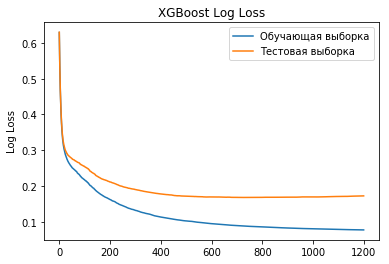

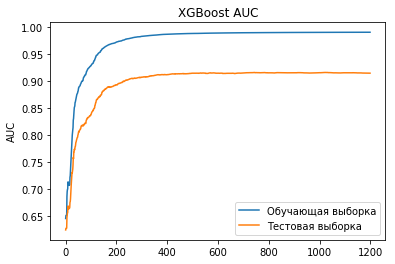

In [18]:
# записываем значения метрик
results = xgb_model_sklearn.evals_result()
# записываем количество итераций
epochs = len(results['validation_0']['auc'])
# задаем диапазон значений (итераций) для оси x
x_axis = range(0, epochs)
# строим график логистической функции потерь
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Обучающая выборка')
ax.plot(x_axis, results['validation_1']['logloss'], label='Тестовая выборка')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# строим график AUC
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Обучающая выборка')
ax.plot(x_axis, results['validation_1']['auc'], label='Тестовая выборка')
ax.legend()
pyplot.ylabel('AUC')
pyplot.title('XGBoost AUC')
pyplot.show()

In [19]:
# применяем раннюю остановку
xgb_model_sklearn.fit(X_train, 
                      y_train, 
                      early_stopping_rounds=30, 
                      eval_metric='auc', 
                      eval_set=eval_set, 
                      verbose=True)

[0]	validation_0-auc:0.623989
Will train until validation_0-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.626896
[2]	validation_0-auc:0.626909
[3]	validation_0-auc:0.626922
[4]	validation_0-auc:0.62717
[5]	validation_0-auc:0.646825
[6]	validation_0-auc:0.652058
[7]	validation_0-auc:0.655712
[8]	validation_0-auc:0.655963
[9]	validation_0-auc:0.668141
[10]	validation_0-auc:0.668129
[11]	validation_0-auc:0.662928
[12]	validation_0-auc:0.663282
[13]	validation_0-auc:0.663156
[14]	validation_0-auc:0.664472
[15]	validation_0-auc:0.66411
[16]	validation_0-auc:0.66568
[17]	validation_0-auc:0.675278
[18]	validation_0-auc:0.67631
[19]	validation_0-auc:0.681215
[20]	validation_0-auc:0.691227
[21]	validation_0-auc:0.700185
[22]	validation_0-auc:0.70835
[23]	validation_0-auc:0.716007
[24]	validation_0-auc:0.723554
[25]	validation_0-auc:0.730108
[26]	validation_0-auc:0.729698
[27]	validation_0-auc:0.733432
[28]	validation_0-auc:0.736812
[29]	validation_0-auc:0.744472
[30]	validation_0-auc

[259]	validation_0-auc:0.904623
[260]	validation_0-auc:0.904697
[261]	validation_0-auc:0.904686
[262]	validation_0-auc:0.904763
[263]	validation_0-auc:0.904213
[264]	validation_0-auc:0.904362
[265]	validation_0-auc:0.904134
[266]	validation_0-auc:0.904349
[267]	validation_0-auc:0.904383
[268]	validation_0-auc:0.904679
[269]	validation_0-auc:0.904519
[270]	validation_0-auc:0.904937
[271]	validation_0-auc:0.905047
[272]	validation_0-auc:0.905375
[273]	validation_0-auc:0.90474
[274]	validation_0-auc:0.904761
[275]	validation_0-auc:0.904903
[276]	validation_0-auc:0.90484
[277]	validation_0-auc:0.904907
[278]	validation_0-auc:0.905054
[279]	validation_0-auc:0.905142
[280]	validation_0-auc:0.905332
[281]	validation_0-auc:0.905456
[282]	validation_0-auc:0.905522
[283]	validation_0-auc:0.905718
[284]	validation_0-auc:0.905969
[285]	validation_0-auc:0.906152
[286]	validation_0-auc:0.906207
[287]	validation_0-auc:0.906218
[288]	validation_0-auc:0.906261
[289]	validation_0-auc:0.906315
[290]	vali

[516]	validation_0-auc:0.914273
[517]	validation_0-auc:0.914309
[518]	validation_0-auc:0.914175
[519]	validation_0-auc:0.914248
[520]	validation_0-auc:0.91429
[521]	validation_0-auc:0.914266
[522]	validation_0-auc:0.914309
[523]	validation_0-auc:0.914279
[524]	validation_0-auc:0.914058
[525]	validation_0-auc:0.914126
[526]	validation_0-auc:0.914173
[527]	validation_0-auc:0.914279
[528]	validation_0-auc:0.914284
[529]	validation_0-auc:0.914306
[530]	validation_0-auc:0.91444
[531]	validation_0-auc:0.914553
[532]	validation_0-auc:0.91474
[533]	validation_0-auc:0.914404
[534]	validation_0-auc:0.914275
[535]	validation_0-auc:0.914299
[536]	validation_0-auc:0.914397
[537]	validation_0-auc:0.914537
[538]	validation_0-auc:0.914598
[539]	validation_0-auc:0.914533
[540]	validation_0-auc:0.914415
[541]	validation_0-auc:0.914641
[542]	validation_0-auc:0.914607
[543]	validation_0-auc:0.914453
[544]	validation_0-auc:0.914478
[545]	validation_0-auc:0.914525
[546]	validation_0-auc:0.914525
[547]	valid

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eta=0.05, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=1200, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)